In [57]:
from sklearn.cluster import KMeans

import numpy as np
import pandas as pd 
from pybaseball import pitching_stats
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt 
from IPython.display import clear_output


In [58]:
players = pitching_stats(2020, 2023)
players.sort_index(inplace=True)

Bauer_2020 = players.index[(players["Name"] == "Trevor Bauer") & (players["Season"] == 2020)].to_list()
Bieber_2020 = players.index[(players["Name"] == "Shane Bieber") & (players["Season"] == 2020)].to_list()

Burns_2021 = players.index[(players["Name"] == "Corbin Burnes") & (players["Season"] == 2021)].to_list()
Ray_2021 = players.index[(players["Name"] == "Robbie Ray") & (players["Season"] == 2021)].to_list()

Verlander_2022 = players.index[(players["Name"] == "Justin Verlander") & (players["Season"] == 2022)].to_list()
Alcantara_2022 = players.index[(players["Name"] == "Sandy Alcantara") & (players["Season"] == 2022)].to_list()

Snell_2023 = players.index[(players["Name"] == "Blake Snell") & (players["Season"] == 2023)].to_list()
Cole_2023 = players.index[(players["Name"] == "Gerrit Cole") & (players["Season"] == 2023)].to_list()


winners_ids = [Bauer_2020, Bieber_2020, Burns_2021, Ray_2021, Verlander_2022, Alcantara_2022, Snell_2023, Cole_2023]

print(winners_ids)

[[1], [0], [14], [33], [2], [10], [9], [22]]


In [59]:
features = ["ERA", 'WHIP', 'FIP']
data = players[features].copy()

In [60]:
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1
data.head

<bound method NDFrame.head of            ERA      WHIP        FIP
0     1.000000  2.317073   1.954217
1     1.177165  1.439024   3.710843
2     1.212598  1.878049   2.865060
3     1.637795  4.731707   4.144578
4     1.673228  3.304878   2.301205
..         ...       ...        ...
163   7.679134  7.804878   7.527711
164   8.263780  8.024390   9.457831
165   8.423228  8.902439   9.197590
166   9.238189  6.378049   9.653012
167  10.000000  9.012195  10.000000

[168 rows x 3 columns]>

In [61]:
kmeans = KMeans(4)
fit = kmeans.fit(data)


/Users/mason_cotter/Desktop/python_projects/Pitching_KMeans/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [62]:
kmeans.inertia_

wcss = []
for i in range(1,7): 
    kmeans = KMeans(i)
    kmeans.fit(data)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

/Users/mason_cotter/Desktop/python_projects/Pitching_KMeans/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mason_cotter/Desktop/python_projects/Pitching_KMeans/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mason_cotter/Desktop/python_projects/Pitching_KMeans/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mason_cotter/De

In [63]:
wcss

[1380.2929446341968,
 606.9535615539272,
 431.19880609672987,
 330.65623729110996,
 285.6465125852209,
 248.74646046029784]

Text(0, 0.5, 'WCSS')

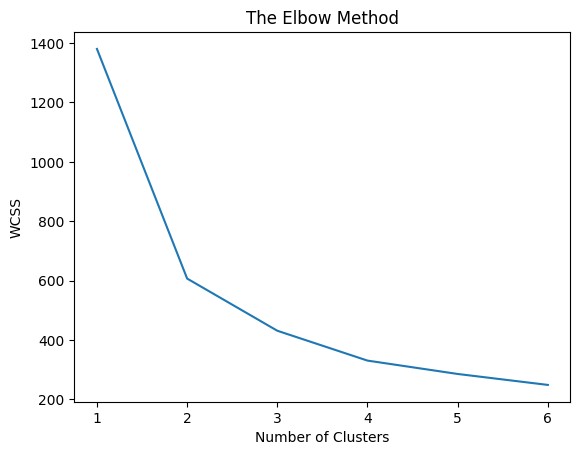

In [64]:
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")


In [65]:
centroids = kmeans.cluster_centers_

In [66]:
pd.DataFrame(centroids, columns=features).T

,0,1,2,3,4,5
ERA,3.809843,8.192913,2.410761,5.038904,6.327226,3.645873
WHIP,4.353049,8.559451,3.199187,6.213415,7.530488,5.677881
FIP,5.083614,9.278916,3.514056,6.052441,7.372567,4.339011


In [67]:
fit.labels_[winners_ids]


array([[2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [0],
       [2]], dtype=int32)

These groups seem to be similar to my groups from scratch which is a good sign. However, they do jump around everytime I run the program so I'm not sure if there is a way to hone this. Maybe I need to use the elbow method in the future. 

I tried the elbow method but I'm unsure if I actually did it correclty. Not sure how to initialize the situation. I did the elbow method with i in range(1,168) and from range(1,7) and they didnt seem to give conclusive results. 